# Load in the DataFrame

In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

#Create your df here:
df = pd.read_csv("profiles.csv")

# Explore the data

In [50]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [51]:
df.education.value_counts()

graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

In [52]:
df.income.value_counts()

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

# Question: Can we predict education level with income and average length of essays?

# Augment Data

In [54]:
essay_cols = ["essay0","essay1","essay2","essay3","essay4",
              "essay5","essay6","essay7","essay8","essay9"]
# removing the nan  in essay_cols
df[essay_cols] = df[essay_cols].replace(np.nan, '', regex=True)

In [55]:
# combine the essays
all_essays = df[essay_cols].apply(lambda x: ' '.join(x), axis=1)
# create a column to store the average length of essays
df['essay_ave_len'] = all_essays.apply(lambda x: len(x)/len(essay_cols))


# Define Education levels

We will regroup education levels to the following categories: 
* Post graduate degree
* College graduate       
* Some college            
* High school or less  

In [56]:
post_graduate=['graduated from masters program', 
              'graduated from ph.d program',
              ]

In [57]:
college_graduate=['graduated from college/university',
                  'working on masters program',
                  'graduated from two-year college',
                  'working on ph.d program',
                  'dropped out of masters program',
                  'masters program',
                  'dropped out of ph.d program',
                  'ph.d program',
                  'graduated from law school',
                   'graduated from med school',
                  
                 ]

In [58]:
some_college=['working on college/university',
             'working on two-year college',
              'college/university',
              'working on law school',
              'two-year college',
              'working on med school',
              'law school',
              'med school'
             ]

In [59]:
high_school_or_less=['graduated from high school',
                    'dropped out of college/university',
                    'graduated from space camp',
                     'dropped out of space camp',
                     'working on space camp',
                     'dropped out of two-year college',
                     'dropped out of high school',
                     'high school',
                     'working on high school',
                     'space camp',
                     'dropped out of law school',
                     'dropped out of med school'
                     
                    ]

In [60]:
education_mapping = {}
for x in post_graduate: 
    education_mapping[x]=3
for x in college_graduate: 
    education_mapping[x]=2 
for x in some_college:
    education_mapping[x]=1
for x in high_school_or_less: 
    education_mapping[x]=0

In [61]:
df["education_level"] = df.education.map(education_mapping)

In [62]:
df.education_level.value_counts()

2.0    30153
3.0    10233
1.0     8320
0.0     4612
Name: education_level, dtype: int64

# Define do_smoke

In [63]:
do_smoke_mapping = {"no": 0, "sometimes": 1, "when drinking": 1, 
                  "yes": 1, "trying to quit": 1}
df["do_smoke"] = df.smokes.map(do_smoke_mapping)

# Define do_drug

In [64]:
do_drug_mapping = {"never": 0, "sometimes": 1, "often": 1}
df["do_drug"] = df.drugs.map(do_drug_mapping)

In [65]:
# Define do_smoke

do_smoke_mapping = {"no": 0, "sometimes": 1, "when drinking": 1, 
                  "yes": 1, "trying to quit": 1}
df["do_smoke"] = df.smokes.map(do_smoke_mapping)

# Define do_drug

do_drug_mapping = {"never": 0, "sometimes": 1, "often": 1}
df["do_drug"] = df.drugs.map(do_drug_mapping)

# Mapping of status

In [104]:
df['status_code']=df.status.map({'single':0, 'seeing someone':1, 
                                'available':2,
                                'married':3})

# Drop NA

In [100]:
all_data=df.dropna(subset=['education_level', 'income'])

# Plot the Data

In [67]:
education_level=all_data['education_level'].tolist()

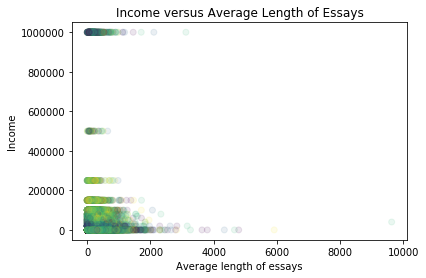

In [68]:
from matplotlib import pyplot as plt
plt.scatter(all_data['essay_ave_len'],all_data['income'], alpha=0.1,c=education_level)
plt.xlabel("Average length of essays")
plt.ylabel("Income")
plt.title('Income versus Average Length of Essays')
plt.show()

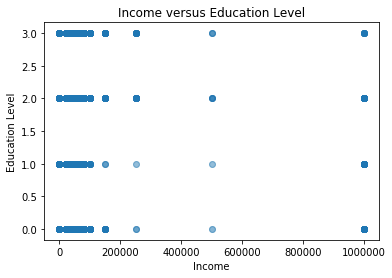

In [69]:
from matplotlib import pyplot as plt
plt.scatter(all_data['income'],all_data['education_level'], alpha=0.1)
plt.xlabel("Income")
plt.ylabel("Education Level")
plt.title('Income versus Education Level')
plt.show()

In [70]:
# Find the data of percentage of smoking and drug usage among 
# different categories of educational levels
education_level_smokes_data=[]
education_level_drugs_data=[]

for i in range(4): 
    specified_data=all_data.loc[all_data["education_level"]==i]
    do_smoke=specified_data.do_smoke.value_counts().tolist()
    do_drug=specified_data.do_drug.value_counts().tolist()
    
    education_level_smokes_data.append(do_smoke)
    education_level_drugs_data.append(do_drug)
    
education_level_smokes_data_percentage=[]
for x in education_level_smokes_data: 
    total=sum(x)
    education_level_smokes_data_percentage.append(
    [y/total*100 for y in x])
    
education_level_drugs_data_percentage=[]
for x in education_level_drugs_data: 
    total=sum(x)
    education_level_drugs_data_percentage.append(
    [y/total*100 for y in x])

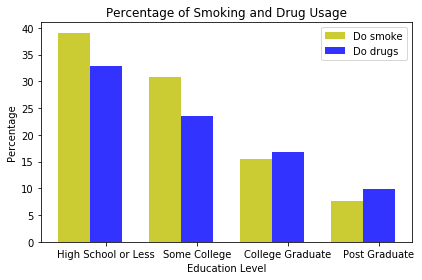

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 4
percentage_smokes = [x[1] for x in education_level_smokes_data_percentage]
percentage_drugs = [x[1] for x in education_level_drugs_data_percentage]

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index,percentage_smokes, bar_width,
alpha=opacity,
color='y',
label='Do smoke')

rects2 = plt.bar(index + bar_width, percentage_drugs, bar_width,
alpha=opacity,
color='b',
label='Do drugs')

plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.title('Percentage of Smoking and Drug Usage')
plt.xticks(index + bar_width, ('High School or Less', 
                               'Some College', 
                               'College Graduate',
                               'Post Graduate'))
plt.legend()

plt.tight_layout()
plt.show()

# Normalize The Data

In [72]:
from sklearn.preprocessing import scale
labels=all_data['education_level']
data=all_data[['essay_ave_len', 'income']]
scaled_data=scale(data, axis=0)

# Create the Training Set and Test Set

In [73]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(
scaled_data, labels, test_size=0.2, random_state=1)

# Using the Classifier

In [74]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(train_data, train_labels)
print(classifier.score(test_data, test_labels))
print(classifier.score(train_data,train_labels))

0.4789947486871718
0.5834857223238149


# Choosing K

We've tested our classifier with `k = 5`, but maybe there's a `k` that will work better. Let's test many different values for `k` and graph the results. 

In [82]:
import matplotlib.pyplot as plt
max_score=0
max_k=0
scores=[]
for k in range(1,100):
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_data, train_labels)
    score=classifier.score(test_data, test_labels)
    scores.append(score)
    if score>max_score: 
        max_score=score
        max_k=k

In [83]:
max_score, max_k

(0.5671417854463616, 42)

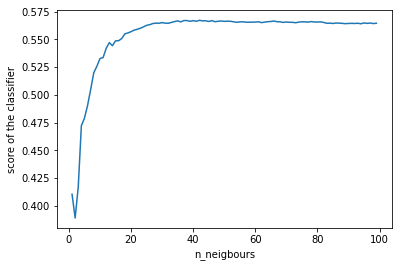

In [102]:
plt.plot(range(1,100), scores)
plt.xlabel("n_neigbours")
plt.ylabel("score of the classifier")
plt.show()

# Explore different combinations of features from income, essay_ave_len, do_smoke and do_drug

In [29]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [ ]:
              
def cluster_with_feature(labels, data):
    
    scaled_data=scale(data, axis=0)


    train_data, test_data, train_labels, test_labels = train_test_split(
    scaled_data, labels, test_size=0.2, random_state=1)


    max_score=0
    max_k=0
    for k in range(1,100,5):
        classifier=KNeighborsClassifier(n_neighbors=k)
        classifier.fit(train_data, train_labels)
        score=classifier.score(test_data, test_labels)
        if score>max_score:
            max_score=score
            max_k=k
    return max_score, max_k

In [101]:
all_data=df.dropna(subset=['education_level', 'income', 'essay_ave_len'])
labels=all_data['education_level']
data=all_data[['income', 'essay_ave_len']]
cluster_with_feature(labels, data)

(0.5671417854463616, 42)

In [110]:
all_data=df.dropna(subset=['education_level', 'income'])
labels=all_data['education_level']
data=all_data[['income']]
cluster_with_feature(labels, data)

(0.5679857464366092, 15)

In [111]:
all_data=df.dropna(subset=['education_level', 'essay_ave_len'])
labels=all_data['education_level']
data=all_data[['essay_ave_len']]
cluster_with_feature(labels, data)

(0.5617966991747937, 72)

In [112]:
all_data=df.dropna(subset=['education_level', 'do_smoke', 'do_drug'])
labels=all_data['education_level']
data=all_data[['do_smoke', 'do_drug']]
cluster_with_feature(labels, data)

(0.5397981346620672, 5)

In [113]:
all_data=df.dropna(subset=['education_level', 'do_smoke', 'do_drug', 'income'])
labels=all_data['education_level']
data=all_data[['do_smoke', 'do_drug', 'income']]
cluster_with_feature(labels, data)

(0.5472083812444104, 44)

In [114]:
all_data=df.dropna(subset=['education_level', 'do_smoke', 'do_drug', 
                           'income', 'essay_ave_len'])
labels=all_data['education_level']
data=all_data[['do_smoke', 'do_drug', 'income', 'essay_ave_len']]
cluster_with_feature(labels, data)

(0.5426089178484732, 83)

In [115]:
all_data=df.dropna(subset=['education_level', 'do_smoke',  
                           'income', 'essay_ave_len'])
labels=all_data['education_level']
data=all_data[['do_smoke', 'income', 'essay_ave_len']]
cluster_with_feature(labels, data)

(0.5630635194002634, 99)

In [116]:
all_data=df.dropna(subset=['education_level', 'do_drug',  
                           'income', 'essay_ave_len'])
labels=all_data['education_level']
data=all_data[['do_drug', 'income', 'essay_ave_len']]
cluster_with_feature(labels, data)

(0.5592950679231429, 64)

In [117]:
all_data=df.dropna(subset=['education_level', 'do_drug'])
labels=all_data['education_level']
data=all_data[['do_drug']]
cluster_with_feature(labels, data)

(0.5552563945661486, 3)

In [118]:
all_data=df.dropna(subset=['education_level', 'do_smoke'])
labels=all_data['education_level']
data=all_data[['do_smoke']]
cluster_with_feature(labels, data)

(0.5560733461655354, 4)

In [107]:
all_data=df.dropna(subset=['education_level', 'income', 'age'])
labels=all_data['education_level']
data=all_data[['income','age']]
cluster_with_feature(labels, data)

(0.6041822955738935, 69)

# The best score is 0.604 where the feature used to learn the model is income and age. 
# The accuracy we would expect from predicting a education level by randomly selecting one would be 1/4, which is 0.25. 
# Our model outperform this number. 